In [47]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

# import logging
# logging.getLogger("tensorflow").setLevel(logging.ERROR)
# tf.autograph.set_verbosity(0)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [48]:
# load dataset
X, y = load_data()

In [58]:
X.shape

(1000, 400)

In [49]:
def visualize(X, y):
    m, n = X.shape
    
    fig, axes = plt.subplots(8,8, figsize=(4,4))
    fig.tight_layout(pad=0.1)
    
    for i,ax in enumerate(axes.flat):
        # Select random indices
        random_index = np.random.randint(m)
        
        # Select rows corresponding to the random indices and
        # reshape the image
        X_random_reshaped = X[random_index].reshape((20,20)).T
    
        
        # Display the image
        ax.imshow(X_random_reshaped, cmap='gray')
        
        # Display the label above the image
        ax.set_title(y[random_index,0])
        ax.set_axis_off()

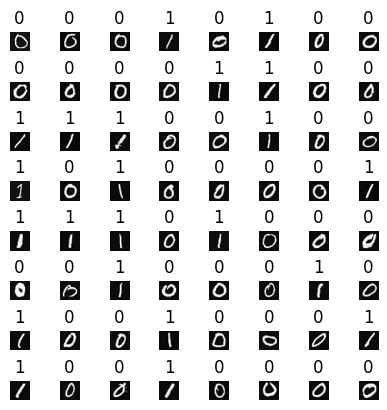

In [50]:
visualize(X, y)

In [85]:
# For this data set, we could even get away with just one single-unit layer
model = Sequential([
    tf.keras.layers.Input(shape=(400,)),
    # Dense(25, activation='sigmoid'),
    # Dense(15, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

In [76]:

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

model.fit(X, y, epochs=20, verbose=0)

In [77]:
y_prob = model.predict(X[0].reshape(1, 400))

1/1 [==============================] - 0s 42ms/step


In [78]:
y_pred = np.array(list(map(lambda x: 1 if x>= 0.5 else 0, y_prob)))
print(y_pred)

[0]


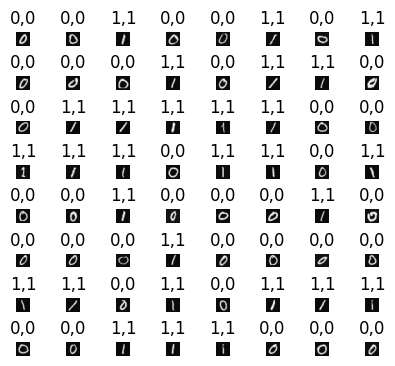

In [79]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(4,4))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400), verbose=0)
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
plt.show()

In [86]:
def predict(X, model):
    m = X.shape[0]
    pred = []

    ten_pc = m/10
    
    for i in range(m):
        p = model.predict(X[i].reshape(1,400), verbose=0)
        pred.append(p)
        
        if i%ten_pc == 0:
            print(f'Completed {i/10}%')
    print(f'Completed 100%%')
            
    return pred
        

In [87]:
y_pred = predict(X, model)

Completed 0.0%
Completed 10.0%
Completed 20.0%
Completed 30.0%
Completed 40.0%
Completed 50.0%
Completed 60.0%
Completed 70.0%
Completed 80.0%
Completed 90.0%
Completed 100%%


In [82]:
y_prob = list(map(lambda x: 1 if x>= 0.5 else 0, y_pred))

In [83]:
def evaluate(y_train, y_prob):
    correct = 0
    m = len(y_train)
    for i in range(m):
        if y_train[i] == y_prob[i]:
            correct+=1
    return round(correct/m * 100)

In [84]:
evaluate(y, y_prob)

100